#Project Objective

Let’s assume the above table is what the HR team of a company uses to determine what salary to offer to a new employee. For our project, let’s take an example that an employee has applied for the role of a Regional Manager and has already worked as a Regional Manager for 2 years. So based on the table above — he falls between level 6 and level 7 — Lets say he falls at level 6.5

We want to build a model to predict what salary we should offer this new employee.

In [1]:
# Step 1 - Load Data
import pandas as pd

In [2]:
dataset = pd.read_csv("/content/Position_Salaries.csv")

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.Level.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

#Step 1: Load the Dataset
If we look at the dataset, we need to predict the salary for an employee who falls under Level 6.5 — So we really do not need the first column “Position”.

Here X is the independent variable which is the “Level”.
And y is the dependent variable which is the “Salary”.

In [5]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [6]:
X


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

#Step 2: Fit Linear Regression model to dataset

First we will build a simple Linear Regression model to see what prediction it makes and then compare it to the prediction made by the Polynomial Regression to see which is more accurate.




In [8]:
# Step 2 - Fitting Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

#Step 3: Visualize Linear Regression Results
Let’s plot the graph to look at the results for Linear Regression.

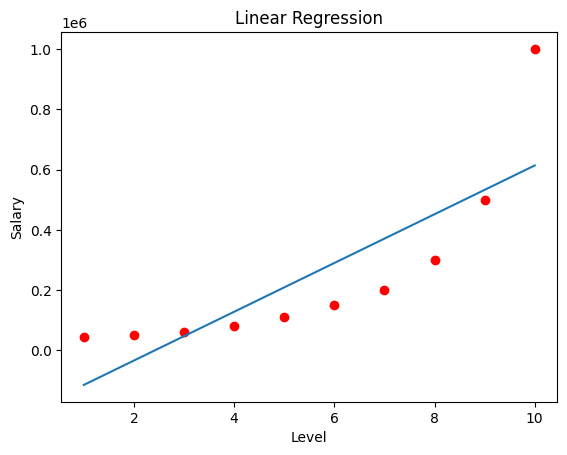

In [9]:

# Step 3 - Visualize Linear Regression Results
import matplotlib.pyplot as plt

plt.scatter(X,y, color="red")
plt.plot(X, lin_reg.predict(X))
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

#Step 4: Predict Linear Regression Results

In [10]:
# Step 4 Linear Regression prediction
lin_reg.predict([[6.5]])

array([330378.78787879])

We can see that the prediction is way off as it predicts 330k.

Now lets check the predictions by implementing Polynomial Regression

#Step 5: Convert X to polynomial format

For Polynomial Regression, we need to transform our matrix X to X_poly where X_poly will contain X to the power of n — depending upon the degree we choose.

If we choose degree 2, then X_poly will contain X and X to the power 2.

If we choose degree 3, then X_poly will contain X, X to the power 2 and X to the power 3.

We will be using the PolynomialFeatures class from the sklearn.preprocessing library for this purpose. When we create an object of this class — we have to pass the degree parameter.

Let’s begin by choosing degree as 2. Then we call the fit_transform method to transform matrix X.

In [11]:
# Step 5 - Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [12]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

If you see, the 2nd column is the actual levels from 1 to 10 present in X.

The 3rd column contains X raised to the power 2 (as we chose degree 2)

The first column contains just 1’s — This is automatically added by the PolynomialFeatures class to include the constant b0.

#Step 6: Fitting Polynomial Regression

Now we will create a new linear regression object called lin_reg_2 and pass X_poly to it instead of X that we passed in Step 2.

In [13]:

# Step 6 - Passing X_poly to LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)


LinearRegression()

#Step 7: Visualize Poly Regression Results
Let’s plot the graph to look at the results for Polynomial Regression.

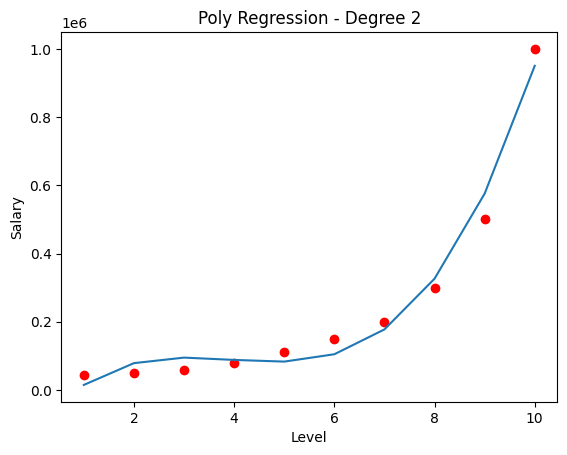

In [19]:
# Step 7 - Visualize Poly Regression Results
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression - Degree 2")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()


If we look at the graph, we can see that a person at level 6.5 should be offered a salary of around $190k. We will confirm this in next step.

#Step 8: Predict Polynomial Regression Results

In [15]:

# Step 8 Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print('The predicted salary of a person at 6.5 Level is ',new_salary_pred)

The predicted salary of a person at 6.5 Level is  [189498.10606061]


We get a prediction of $189k. It is not too bad. But let us increase the degree and see if we get better results.

#Step 9 — Change degree to 3 and run steps 5–8

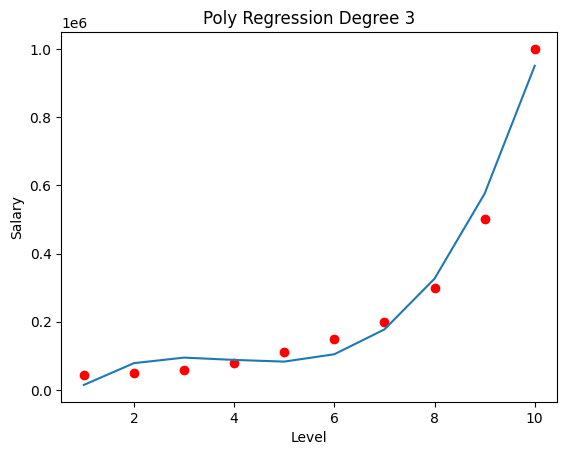

In [21]:


# Step 5 - Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

 # Step 6 - Passing X_poly to LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

# Step 7 - Visualize Poly Regression Results
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression Degree 3")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()



In [22]:
# Step 8 Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print('The predicted salary of a person at 6.5 Level is ',new_salary_pred)

The predicted salary of a person at 6.5 Level is  [133259.46969697]


Among the three models for predicting the previous salary of a new employee using Polynomial Regression, the model with Polynomial Regression of Degree 3 seems to be the best option.
The Polynomial Regression (Degree 3) model predicts a salary of approximately $133,259.47 for a person at position level 6.5.
This prediction seems to be closer to the actual salary and is less influenced by extreme values.
